# Section 1: Computing probabilities using Python
- A *sample space* is the set of all possible outcomes an action can produce
- An *event* is a subset of the sample space containing just those outcomes that satisfy some *event condition*. An event condition is a Boolean function that takes as input an outcome and returns either `True` or `False`.
- The *probability* of an event equals the fraction of event outcomes over all the possible outcomes in the entire sample space.
- Probabilities can be computed over *numeric intervals*. An interval is defined as the set of all the numbers sandwiched between two boundary values.
- Interval probabilities are useful for determining whether an observation appears extreme.

## Sample space analysis
Sample space is the set of all possible outcomes of a particular experiment or trial.
Event size refers to the number of outcomes in a specific event within that sample space.

For example, if you roll a die, the sample space is the set of all possible outcomes: {1, 2, 3, 4, 5, 6}.

The event size of rolling an even number is 3, because there are three possible outcomes: {2, 4, 6}. Therefore, the probability of rolling an even number is 3/6 = 1/2.

The event size of rolling a number greater than 4 is 2, because there are two possible outcomes: {5, 6}. Therefore, the probability of rolling a number greater than 4 is 2/6 = 1/3.

In [1]:
sample_space = {'Heads', 'Tails'}
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [2]:
# An event is the subset of elements within the sample space that satisfy an event condition. 
# An event condition is a simple Boolean function whose input is a single sample_space element.
# The function returns True only if the element satisfies our condition constraints.
# The book's code originally defined is_neither(outcome) as a negation of is_heads_or_tails(outcome).
# That resulted in an error because is_heads_or_tails(outcome) returned a Boolean value, not an element.

def is_heads_or_tails(outcome): return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return outcome not in {'Heads', 'Tails'}

In [3]:
print(f'"Grafton" is a valid outcome: {is_heads_or_tails("Grafton")}')
print(f'"Heads" is a valid outcome: {is_heads_or_tails("Heads")}')

"Grafton" is a valid outcome: False
"Heads" is a valid outcome: True


In [4]:
is_neither(sample_space)

True

In [5]:
# Define additional event conditions
def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'

In [6]:
is_heads('Tails')

False

In [7]:
# Define a function that iterates through the generic sample space and returns the set of outcomes where event_condition(outcome)) is True.
# Leonard has a less Pythonic way of doing this, but I think this is more elegant.

def get_matching_event(event_condition, sample_space):
    return {outcome for outcome in sample_space if event_condition(outcome)}

In [8]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f'Event Condition: {event_condition.__name__}')
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Tails', 'Heads'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [9]:
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(sample_space)

In [10]:
for event in event_conditions:
    prob = compute_probability(event, sample_space)
    name = event_condition.__name__
    print(f"Probability of '{name}' is {prob}")

Probability of 'is_neither' is 1.0
Probability of 'is_neither' is 0.5
Probability of 'is_neither' is 0.5
Probability of 'is_neither' is 0.0


### Analyzing a biased coin

In [11]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

In [12]:
# Redefine the sample size space as the sum of all dictionary weights and check that it equals 5.
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

In [13]:
# Checking the weighted event size
event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event) # Sums the weights of the event outcomes
assert event_size == 5

In [14]:
# Defining a generalized event probability function
# Used for complex events that involve multiple conditions
def compute_event_probability(event_condition, generic_sample_space) -> float:
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event) # Sums the weights of the event outcomes
    return event_size / sum(generic_sample_space.values()) # Returns the probability of the event by dividing the size of the event by the total sample space

In [15]:
# Computing weighted event probabilities
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


## Computing nontrivial probabilities

### Analyzing a family with four children
What is the probability that exactly two of the children in a family of four are boys? Assume that each child is equally likely to be either a boy or a girl.

In [16]:
# Inefficiently computing the sample space of children
possible_children = ['Boy', 'Girl']
sample_space = set() # Initialize an empty set
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)

In [17]:
# Computing the sample space using `product`
from itertools import product
all_combinations = product(*(4 * [possible_children])) # The * operator unpacks the list into 4 separate arguments
assert set(all_combinations) == sample_space

In [18]:
# Computing the sample space using `product` and `repeat`
sample_space_efficient = set(product(possible_children, repeat=4)) # repeat=4 is equivalent to 4 * [possible_children]
assert sample_space_efficient == sample_space # Check that the two sample spaces are equal

In [19]:
# Computing the probability of two boys after defining a has_two_boys event condition
def has_two_boys(outcome): return len([child for child in outcome if child == 'Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f"The probability of 2 boys is {prob}")

The probability of 2 boys is 0.375


### Analyzing multiple die rolls
What is the probability that a 6d6 roll will add up to 21?

In [20]:
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [21]:
# Create a sample space for six consecutive rolls using the product function
sample_space = set(product(possible_rolls, repeat=6))

In [22]:
# Compute the probability of a die-roll sum by defining a has_sum_of_21 event condition
def has_sum_of_21(outcome): return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


In [23]:
# Let's try it again, but with a lambda function.
# For some reason, this makes more sense to me. The syntax is less awkward.
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

### Computing die-roll probabilities using weighted sample spaces
We need to convert our unweighted sample space set into a weighted sample space dictionary, which requires us to identify all possible die-roll sums. Then we count the number of times each sum appears across all possible die-roll combinations. (Remember that the combinations are already stored in our computed `sample_space` set.)

In [24]:
from collections import defaultdict
weighted_sample_space = defaultdict(int) # Initialize a dictionary with default value of 0
for outcome in sample_space:
    total = sum(outcome) # Computes the summed value of six unique die rolls
    weighted_sample_space[total] += 1 # Updates the occurrence count (weight) for a summed dice value

In [25]:
# Check the rare die-roll combinations
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

In [26]:
# Check the more common die-roll combinations
num_combinations = weighted_sample_space[21]
print(f"There are {num_combinations} combinations that sum to 21")

There are 4332 combinations that sum to 21


In [27]:
assert sum([4,4,4,4,3,2]) == 21
assert sum([4,4,4,5,3,1]) == 21

In [28]:
# The observed count of 4,332 is equal to the length of the unweighted event whose die rolls add up to 21.
# Also, the sum of values in weighted_sample is equal to the length of sample_space.

event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

In [29]:
# Recompute the probability using the weighted_sample_space dictionary.
# The final probability of rolling a 21 should remain unchanged.

prob = compute_event_probability(lambda x: x == 21, weighted_sample_space) # The lambda function returns True if the input is 21
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


In [30]:
# Let's check the memory usage of each method of computing the sample space.

print(f'Number of Elements in Unweighted Sample Space: {len(sample_space)}')
print(f'Number of Elements in Weighted Sample Space: {len(weighted_sample_space)}')

Number of Elements in Unweighted Sample Space: 46656
Number of Elements in Weighted Sample Space: 31


## Computing probabilities that span interval value ranges
An interval is the set of all the numbers between and including two boundary cutoffs. For example, the interval [1, 3] is the set {1, 2, 3}.

This section introduces `is_in_interval()`, a function that determines whether a value is in a specified interval. The function takes three arguments: the value to be tested, the lower boundary of the interval, and the upper boundary of the interval. The function returns `True` if the value is in the interval and `False` otherwise.

In [31]:
# Dfine an interval function that checks whether a value is within a specified interval. 
def is_in_interval(number, minimum, maximum) -> bool: return minimum <= number <= maximum

In [32]:
# Compute the likelihood that six consecutive die rolls sum to a value between 10 and 21 (inclusive)
# The lambda function returns True if the input is between 10 and 21. This is the event condition.
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space) 
print(f"The probability of a sum between 10 and 21 is {prob}")

The probability of a sum between 10 and 21 is 0.5446244855967078


### Evaluating extremes using interval analysis
One problem that interval analysis can solve is the evaluation of extremes: is observed data too extreme to be believable? If a fair coin flips heads eight out of 10 times, is this a believable outcome? This elicits the question: what is the probability of flipping eight to 10 heads out of 10 flips of a fair coin? We find the answer by computing an interval probability.

In [33]:
# Create a weighted sample space for the number of heads in 10 coin flips
# We expect weighted_sample_space[10] to equal 1 because there is only one way to get 10 heads in 10 flips.
# Meanwhile, weighted_sample_space[9] should equal 10, since there is just one possible way to flip a coin 10 times and get 9 heads.
# Accordingly, weighted_sample_space[5] should equal 252 because there are 252 ways to get 5 heads in 10 flips.

from collections import defaultdict
from itertools import product

def generate_coin_sample_space(num_flips=10):
    sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips): # This is a new way to use the product function
        heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads'])
        sample_space[heads_count] += 1
    return sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

In [34]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f'Probability of observing more than 7 yeads is {prob}')

Probability of observing more than 7 yeads is 0.0546875


In [35]:
# 10 fair coin flips produce more than seven heads about 5% of the time.
# This doesn't necessarily mean the coin is biased.
# We need to include the likeliness of observing eight tails or more to evaluate fairness. 
# Let's compute the probability that the coin flips do not produce from three to seven heads. 

prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f'The probability of observing more than 7 heads or 7 tails is {prob}')

The probability of observing more than 7 heads or 7 tails is 0.109375


In [36]:
# Let's try more observations. If we double the flips, we should see a more even distribution of heads and tails.
# To test for fairness, we should find the probability of 20 flips not producing between 5 and 15 heads.
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15), weighted_sample_space_20_flips)
print(f'The probability of observing more than 15 heads or 15 tails is {prob}')

# The probability dropped 10-fold, but the ratio of heads to tails remains constant at 4 to 1.
# This should make sense as it's based on a biased coin. 
# Why does the probability of observing an extreme result decrease as the coin is flipped more times?

The probability of observing more than 15 heads or 15 tails is 0.01181793212890625


# Section 2: Plotting probabilities using Matplotlib

## Basic Matplotlib plots

In [37]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib.pyplot as plt

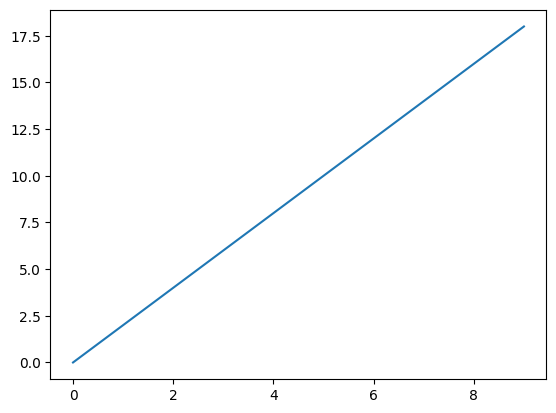

In [39]:
# Plotting a linear relationship
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

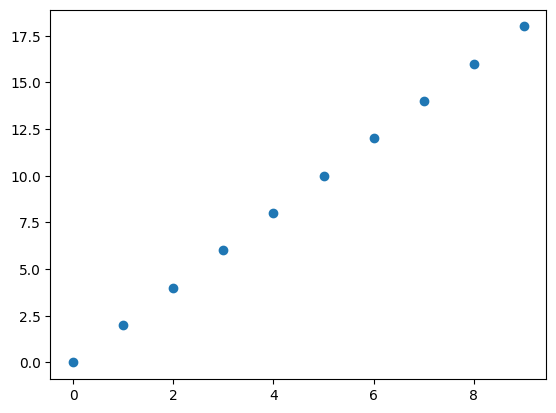

In [40]:
# Plotting individual data points
plt.scatter(x,y)
plt.show()

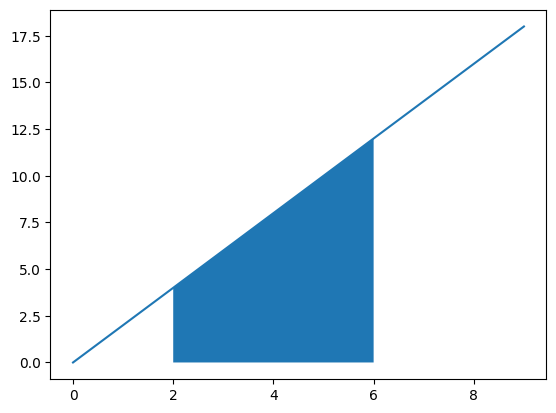

In [41]:
# Shading an interval of interest beneath a line plot
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, 0, where=where)
plt.show()